<a href="https://colab.research.google.com/github/rachit-shah/Apparent-Age-Prediction-using-CNN/blob/master/Dynamic_Average_Waiting_Time_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns
from datetime import datetime, timedelta
sns.set(style="whitegrid")
import time
import os
import gc

In [0]:
#Load ALL csv files to process compressed in one zip file named csv.zip and upload
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
!unzip csv.zip -d csv
!rm -r csv/__MACOSX
!ls csv

Saving csv.zip to csv.zip
User uploaded file "csv.zip" with length 93080 bytes


In [0]:
#Connect your Google Drive by clicking on the generated link, signing in and copying the generated secret here
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#Calculate timestamp from given frame number
def timestamp(frame_number):
  days = frame_number // 24
  hours = frame_number % 24
  return "%dD : %dH" % (days,hours)

#Helper methods for matplotlib animation
def init():
  return rs

def animate(i):
  global rs,time_text
  y = df.iloc[i]
  heights=list(y)
  for h,r in zip(heights,rs):
    r.set_height(h)
  time_text.set_text(timestamp(i+1))
  return rs

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


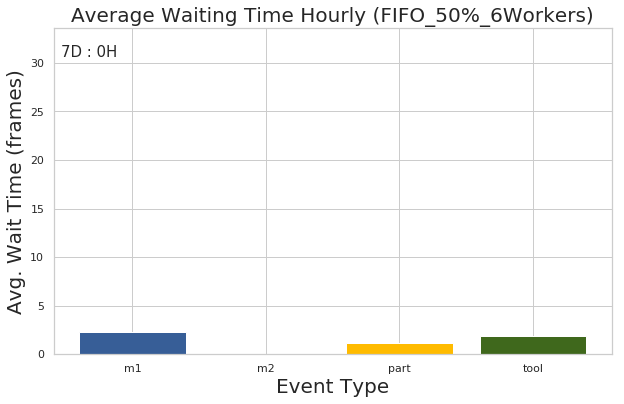

Time taken:  8006


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


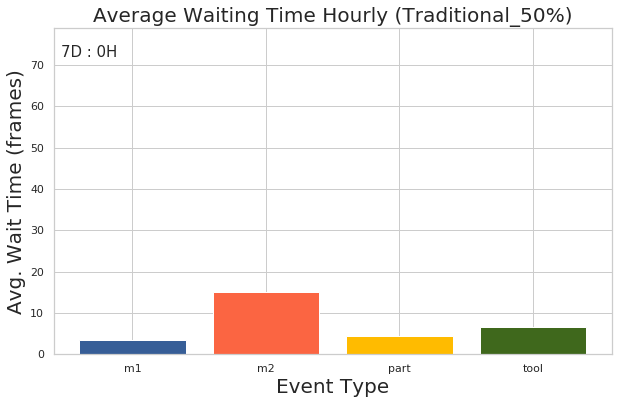

Time taken:  8722


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


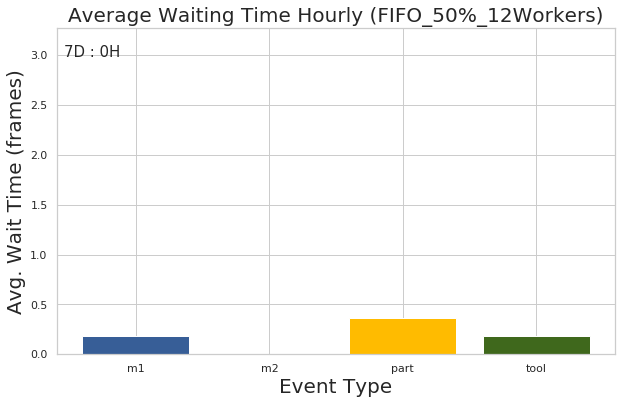

Time taken:  8759


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


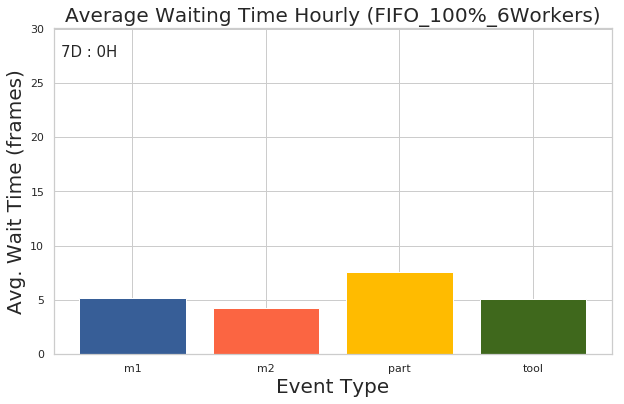

Time taken:  8603


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


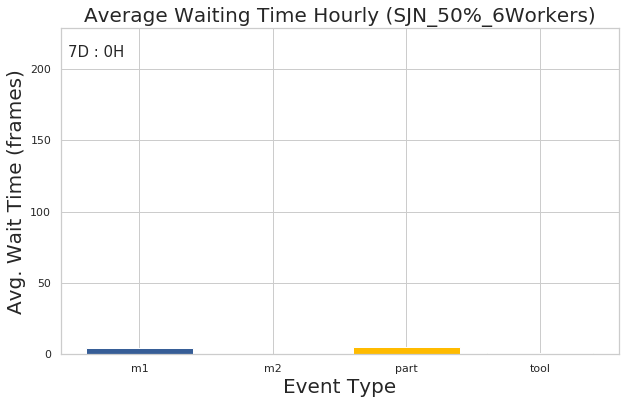

Time taken:  8091


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


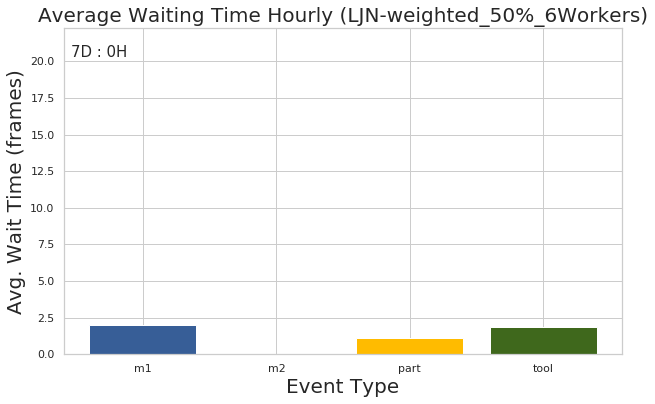

Time taken:  9630


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


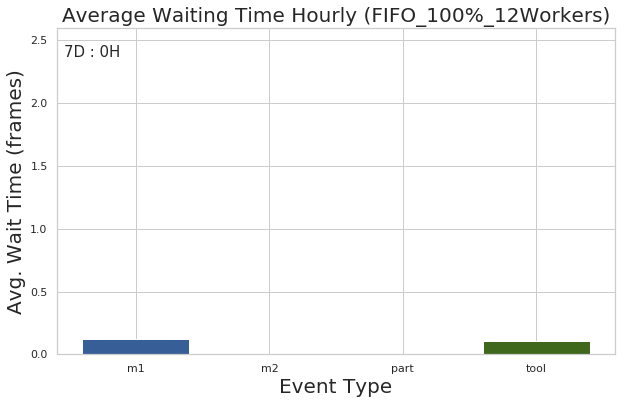

Time taken:  10063


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


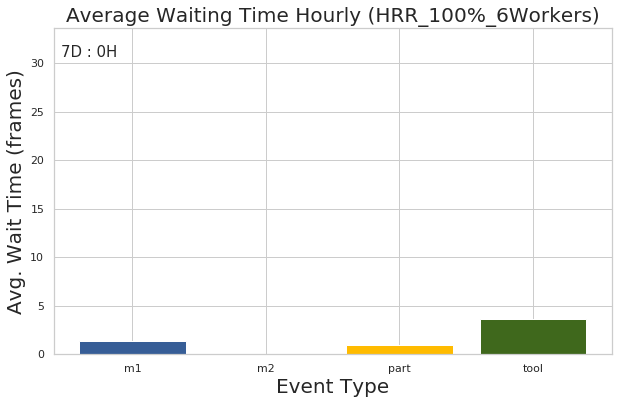

Time taken:  8748


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


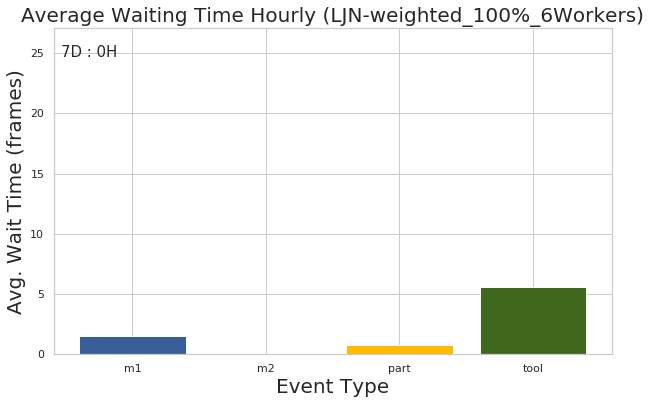

Time taken:  8786


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [0]:
#Load all csv files in the csv folder into panda dataframes and create video
flist = os.listdir('csv')
flist = [x[:-4] for x in flist]
for filename in flist:
  df = pd.read_csv('csv/'+filename+'.csv')
  n=len(df) #Number of frames
  x=list(df.columns)
  stmillis = int(round(time.time() * 1000))
  fig = plt.figure(figsize=(10,6))
  plt.ylim(min(np.min(df)), max(np.max(df)))
  plt.xlabel('Event Type',fontsize=20)
  plt.ylabel('Avg. Wait Time (frames)',fontsize=20)
  plt.title('Average Waiting Time Hourly ('+filename[5:]+')',fontsize=20)
  barcollection = plt.bar(x,df.iloc[0],color=['#375E97','#FB6542','#FFBB00','#3F681C'])
  ax = plt.axes()
  time_text = ax.text(0.013, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes,fontsize=15)
  time_text.set_text(timestamp(0))
  rs = [r for r in barcollection]

  anim=animation.FuncAnimation(fig,animate,init_func=init,repeat=False,blit=True,frames=n,
                               interval=50)
  anim.save(filename+'.mp4',writer=animation.FFMpegWriter(fps=2))
  plt.show()
  endmillis = int(round(time.time() * 1000))
  print("Time taken: ", endmillis - stmillis)
  path = filename +".mp4"
  !cp "$path" gdrive/My\ Drive/.
  